# Исследование рынка заведений общественного питания Москвы

## Задачи проекта

1) Проанализировать объекты, сделать общий вывод и дайть рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. 

2) Прокомментировать возможность развития сети.


In [142]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import requests

In [143]:
df = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/Исследование рынка заведений общественного питания Москвы/rest_data.csv')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [145]:
df.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [146]:
df.isna().mean().apply('{:.0%}'.format)

id             0%
object_name    0%
chain          0%
object_type    0%
address        0%
number         0%
dtype: object

In [147]:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()

In [148]:
df.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

85

Найдено 85 дубликатов. Удалим их.

In [149]:
df.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'], inplace = True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


#  Вывод о качестве данных:

Проблемы в данных были. А именно: 

Данные приведены к нужному регистру.

Пропусков - нет. 

Дубликаты обнаружены в количестве 85шт, были удалены.



In [151]:
df.head(5)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [152]:
df.query('number >600').sort_values( by = 'number')

,id,object_name,chain,object_type,address,number
7104,27033,банкетный,нет,ресторан,"город москва, ленинградский проспект, дом 31а,...",625
6077,29073,столовая 16 при рудн,нет,столовая,"город москва, улица миклухо-маклая, дом 6",644
3401,135197,дурдинъ,нет,ресторан,"город москва, мичуринский проспект, дом 8, стр...",650
7807,66234,стамбул,нет,ресторан,"город москва, улица скульптора мухиной, дом 11",650
2317,73306,ресторан «бета»,нет,ресторан,"город москва, измайловское шоссе, дом 71, корп...",660
7280,26269,ресторан «шахин шах»,нет,ресторан,"город москва, улица маршала захарова, дом 6, к...",675
4110,29320,столовая,нет,столовая,"город москва, каширское шоссе, дом 31",680
13299,200905,white hall,нет,ресторан,"город москва, ферганская улица, дом 8",700
5649,29232,столовая московский гуманитарный университет,нет,столовая,"город москва, улица юности, дом 5, строение 1",760
9955,171116,eataly,нет,ресторан,"город москва, киевская улица, дом 2",920


#### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [153]:
list(df['object_type'].unique())

['кафе',
 'столовая',
 'закусочная',
 'предприятие быстрого обслуживания',
 'ресторан',
 'кафетерий',
 'буфет',
 'бар',
 'магазин (отдел кулинарии)']

In [154]:
count_type = df.pivot_table(index = ['object_type'], values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)
count_type

,id
object_type,
кафе,6071
столовая,2584
ресторан,2282
предприятие быстрого обслуживания,1897
бар,855
буфет,576
кафетерий,395
закусочная,348
магазин (отдел кулинарии),273


In [155]:
count_type['%'] = round(count_type['id']/count_type['id'].sum()*100, 2)

In [156]:
count_type

,id,%
object_type,,
кафе,6071,39.73
столовая,2584,16.91
ресторан,2282,14.93
предприятие быстрого обслуживания,1897,12.41
бар,855,5.60
буфет,576,3.77
кафетерий,395,2.58
закусочная,348,2.28
магазин (отдел кулинарии),273,1.79


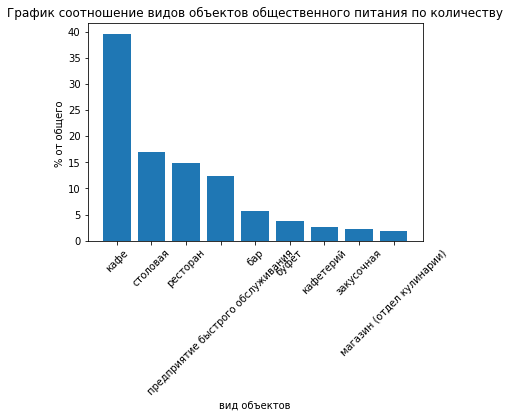

In [157]:
plt.bar(count_type.index,count_type['%'] )

plt.title('График соотношение видов объектов общественного питания по количеству')
plt.xlabel("вид объектов")
plt.ylabel("% от общего ")
plt.xticks(rotation=45)
plt.show()

На графике видно, что лидируте кафе у него 40% от общей доли всех видов заведений, далее идет столовая, ресторан и предприятия быстрого обслужиания.

#### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [158]:
how_chain = df.pivot_table(index = ['chain'], values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)


In [159]:
how_chain

,id
chain,
нет,12317
да,2964


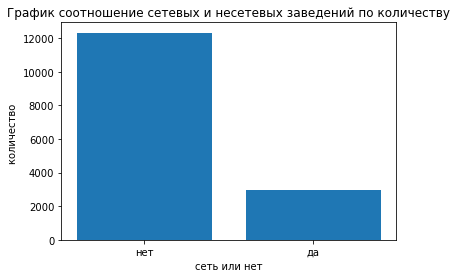

In [160]:
plt.bar(how_chain.index,how_chain['id'] )

plt.title('График соотношение сетевых и несетевых заведений по количеству')
plt.xlabel("сеть или нет")
plt.ylabel("количество ")

plt.show()

На графике видно, что сетевых кафе в 4 раза меньше, около 3 тысяч, а вот не сетевых 12,4 тыс. 

#### Для какого вида объекта общественного питания характерно сетевое распространение?

In [161]:
df_pivot = df.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').reset_index()
df_pivot['share_chain %'] = ((df_pivot['да'] / (df_pivot['да'] + df_pivot['нет'])) * 100).round(2)
df_pivot.drop(df_pivot.columns[[1,2]], axis=1, inplace=True)
df_pivot = df_pivot.sort_values('share_chain %', ascending = False)

In [162]:
df_pivot

chain,object_type,share_chain %
6,предприятие быстрого обслуживания,41.54
5,магазин (отдел кулинарии),28.57
7,ресторан,23.79
3,кафе,22.99
2,закусочная,16.09
4,кафетерий,13.16
0,бар,4.33
1,буфет,1.91
8,столовая,0.12


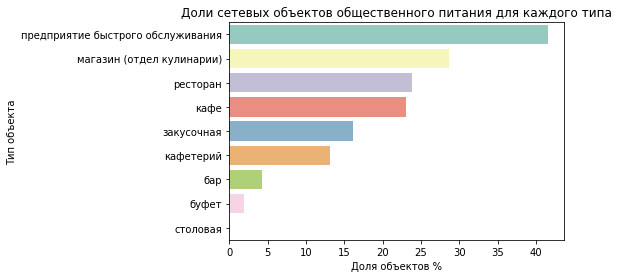

In [163]:
ax = sns.barplot(x='share_chain %', y='object_type', data=df_pivot.sort_values('share_chain %', ascending=False), palette="Set3")
ax.set_title('Доли сетевых объектов общественного питания для каждого типа')
ax.set_xlabel('Доля объектов %')
ax.set_ylabel('Тип объекта')
plt.show()

Среди сетевых лидируют форматы объектов: предприятие быстрого обслуживания, магазин (отдел кулинарии), ресторан и кафе, практически нет сетевых столовых, хотя в Москве их 2587.

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?


In [164]:
chain_object = df.query('chain == "да"')
chain_group =  df.groupby('object_name').agg({'id': 'count', 'number' : 'mean'}).sort_values(by = 'id', ascending = False)
          

In [165]:
chain_group

,id,number
object_name,,
столовая,321,73.757009
кафе,263,27.878327
шаурма,241,0.917012
шоколадница,158,57.126582
kfc,155,55.341935
...,...,...
кафе «288»,1,140.000000
кафе «317»,1,72.000000
кафе «93 с»,1,5.000000


In [166]:
chain_object

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город москва, большая академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36


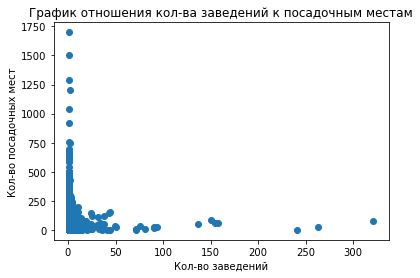

In [167]:
a = plt.scatter(x='id', y = 'number', data = chain_group )
plt.title('График отношения кол-ва заведений к посадочным местам')
plt.xlabel("Кол-во заведений")
plt.ylabel("Кол-во посадочных мест")
plt.show()

для сетевых заведений характерно большое количество точек с небольшим количеством посадочных мест.

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

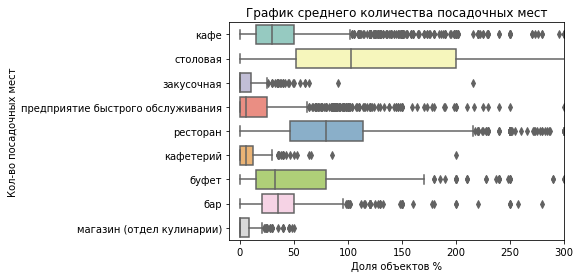

In [168]:
ax = sns.boxplot(x='number', y='object_type', data=df, palette="Set3")
ax.set_xlim(-10,300)
ax.set_title('График среднего количества посадочных мест')
ax.set_xlabel('Доля объектов %')
ax.set_ylabel('Кол-во посадочных мест')
plt.show()

In [169]:
df.groupby('object_type')['number'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
закусочная,348.0,7.847701,16.884497,0.0,0.0,0.0,10.0,216.0
магазин (отдел кулинарии),273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0
кафетерий,395.0,9.184810,14.677023,0.0,0.0,6.0,12.0,200.0
предприятие быстрого обслуживания,1897.0,20.808645,38.563004,0.0,0.0,6.0,25.0,580.0
кафе,6071.0,39.785703,37.751163,0.0,15.0,30.0,50.0,533.0
буфет,576.0,51.425347,56.512850,0.0,15.0,32.0,80.0,320.0
бар,855.0,43.533333,67.112342,0.0,20.0,35.0,50.0,1700.0
ресторан,2282.0,96.884750,94.781446,0.0,46.0,80.0,114.0,1500.0
столовая,2584.0,130.337848,95.189104,0.0,51.5,103.0,200.0,1400.0


In [170]:
temp = df.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index()
temp

,object_type,number
0,столовая,130.337848
1,ресторан,96.884750
2,буфет,51.425347
3,бар,43.533333
4,кафе,39.785703
5,предприятие быстрого обслуживания,20.808645
6,кафетерий,9.184810
7,закусочная,7.847701
8,магазин (отдел кулинарии),5.589744


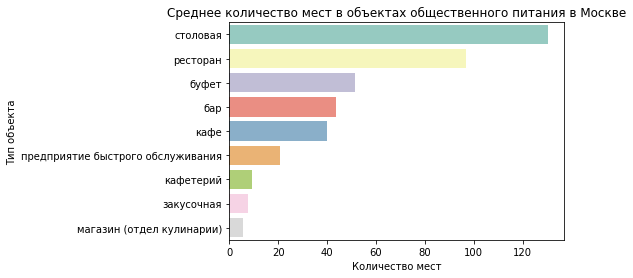

In [171]:
ax = sns.barplot(x='number', y='object_type', data=temp, palette="Set3")
ax.set_title('Среднее количество мест в объектах общественного питания в Москве')
ax.set_xlabel('Количество мест')
ax.set_ylabel('Тип объекта')
plt.xticks(rotation=0)
plt.show()

Лидируют по количеству посадочных мест столовые и рестораны, что было ожидаемо!

Бары, буфеты и кафе с количеством посадочных мест 40-60 идут следом.

#### Выделите в отдельный столбец информацию об улице из столбца address .


In [172]:
df['street_name'] = df['address'].apply(lambda x: x.split(',')[1])
df['street_name'] = df['street_name'].str.strip()
df.head(7)

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек


#### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [173]:
temp = df.groupby('street_name').agg({'id' : 'count'}).sort_values(by = 'id', ascending = False).head(10).reset_index()
top_10 = temp.query('street_name != "город зеленоград" and street_name != "город зеленоград"')

top_10


,street_name,id
1,проспект мира,203
2,профсоюзная улица,181
3,ленинградский проспект,170
4,пресненская набережная,167
5,варшавское шоссе,161
6,ленинский проспект,147
7,поселение сосенское,137
8,проспект вернадского,128
9,кутузовский проспект,114


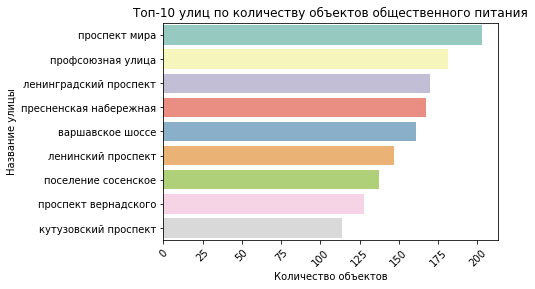

In [174]:
ax = sns.barplot(x='id', y='street_name', data=top_10, palette="Set3")
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
plt.xticks(rotation=45)
plt.show()

In [175]:
id = '1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs'
file = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(id)
r = requests.get(file)
df_street = pd.read_csv(BytesIO(r.content))
df_street

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [176]:
df_street = df_street.rename(columns={'streetname':'street_name'})
df_street['street_name'] = df_street['street_name'].str.lower()
df_street

,street_name,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,Пресненский район
4394,волков переулок,17,ЦАО,Пресненский район
4395,поварская улица,17,ЦАО,Пресненский район
4396,кудринская площадь,17,ЦАО,Пресненский район


In [177]:
district = top_10.merge(df_street, on='street_name', how='left')
district = district.drop(['id','areaid'],1)
district.head(10)

,street_name,okrug,area
0,проспект мира,СВАО,Алексеевский район
1,проспект мира,СВАО,Ярославский Район
2,проспект мира,СВАО,Район Марьина роща
3,проспект мира,СВАО,Останкинский район
4,проспект мира,СВАО,Район Ростокино
5,проспект мира,СВАО,Район Свиблово
6,проспект мира,ЦАО,Мещанский район
7,профсоюзная улица,ЮЗАО,Академический район
8,профсоюзная улица,ЮЗАО,Район Черемушки
9,профсоюзная улица,ЮЗАО,Район Ясенево


Топ-10 улиц располагается в районах СВАО, ЦАО, и ЮЗАО.

#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [178]:
# Сгруппируем данные в датафрейм с 1-м объектом общественного питания
one = df.groupby('street_name').agg({'object_name': 'count'}).sort_values(by = 'object_name', ascending = False)
one = one.query('object_name == 1')
one = one.drop('object_name',1)
one = one.reset_index()
one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street_name  579 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [179]:
#Добавим район и округ и удалим сразу дубликаты
one['street_name'] = one['street_name'].str.strip()
one = one.merge(df_street, on='street_name', how='left')
one.head()
area_nunique = one['area'].drop_duplicates()
area_nunique = area_nunique.dropna()
len(area_nunique)

99

In [180]:
area_nunique.head(10)

0     Красносельский район
1          Можайский Район
3           Район Аэропорт
4      Тимирязевский Район
5          Район Лефортово
6        Пресненский район
7      Нижегородский район
11    Район Соколиная Гора
13        Район Сокольники
14       Район Богородское
Name: area, dtype: object

На основе полученных данных можно сделать вывод, что в Москве: 579 улиц с одним объектом общественного питания, которые находятся в 99 районах города.

#### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

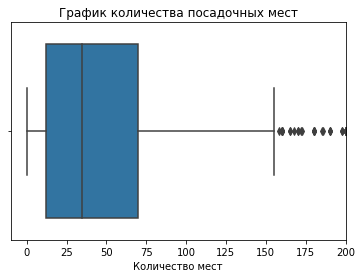

In [181]:
top10 = list(top_10['street_name'])
temp = df[df['street_name'].isin(top10)]
ax = sns.boxplot(x=temp['number'])
ax.set_title('График количества посадочных мест')
ax.set_xlabel('Количество мест')
ax.set_xlim(-10,200)
plt.show()

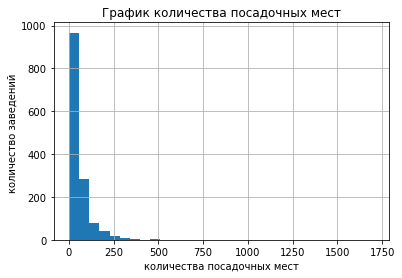

In [182]:
temp['number'].hist(bins=30)
plt.title('График количества посадочных мест')
plt.xlabel("количества посадочных мест")
plt.ylabel("количество заведений ")
plt.show()

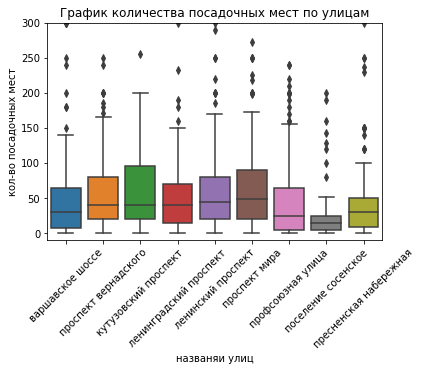

In [183]:
ax = sns.boxplot(x="street_name", y="number", data=temp, orient='v')
plt.xticks(rotation=45)
plt.title('График количества посадочных мест по улицам')
plt.xlabel("названяи улиц")
plt.ylabel("кол-во посадочных мест")
ax.set_ylim(-10,300)
plt.show()

In [184]:
temp['number'].describe()

count    1408.000000
mean       54.905540
std        88.067616
min         0.000000
25%        12.000000
50%        35.000000
75%        70.000000
max      1700.000000
Name: number, dtype: float64

Можно заметить тренд: на популярных улицах количество посадочных мест в заведениях небольшой 20-40, скорее всего сказывается очень высокая цена на аренду коммерческой недвижимости.

# Вывод:


Самые популярные форматы: кафе, столовая и ресторан, притом кафе лидирует с большим отрывом.

Преобладают в основном несетевые заведения.

Большим количеством посадочных мест обладают столовые, рестораны и бары.

По сетевому формату в основном открывают заведения категории "предприятие быстрого обслуживания".

Есть улицы с большим колчеством объектов общественного питания, где нет посадочных мест.

Наибольшее количество объектов питания расположены на главных артериях города: Ленинградском проспекте, Просоюзной улице и проспекте Мира.


Рекомендации: я бы рекомендовал обратить внимание на центральную часть города(постоянный случайный поток посетителей), в частности те улицы, где минимальное количество объектов общественного питания. Формат для заведения следует выбрать "кафе" с количеством посадочных мест 30-50.